Program for [BlockOut Probability](https://ieeexplore.ieee.org/document/6708475) simulation as described in:  
Á. A. M. de Medeiros and M. D. Yacoub, "BlockOut: Blocking and Outage in a Single Performance Measure," in IEEE Transactions on Vehicular Technology, vol. 63, no. 7, pp. 3451-3456, Sept. 2014, doi: 10.1109/TVT.2014.2299438.

[[0.33333611 0.50028869 0.59964963 0.66722288 0.7143039  0.74979215
  0.77811407 0.79915076 0.81882974 0.83357984 0.84685948 0.85711412
  0.86630041 0.87544293 0.88247179 0.88896419 0.89498855 0.90001463
  0.        ]
 [0.28858262 0.43853047 0.53315585 0.59822058 0.64583418 0.68127984
  0.70942597 0.73326518 0.75272094 0.76936888 0.78307303 0.79552755
  0.80604713 0.81470103 0.82344359 0.83153116 0.83817524 0.84497483
  0.        ]
 [0.19154438 0.31174788 0.39425174 0.45698622 0.50396822 0.5424589
  0.57501749 0.60181708 0.62539657 0.64602718 0.66290542 0.67943084
  0.69422076 0.70607149 0.71731669 0.72793478 0.73771228 0.74669315
  0.        ]
 [0.08811496 0.15819437 0.21404933 0.26163573 0.3020111  0.33732652
  0.3678553  0.39599931 0.41894009 0.44106868 0.46236571 0.48065733
  0.49601973 0.51191652 0.52579478 0.53953812 0.55157885 0.56346589
  0.        ]
 [0.04283265 0.08010198 0.11461269 0.14555007 0.17181907 0.19788612
  0.22146299 0.24329158 0.26254787 0.28168731 0.29935393 0.31

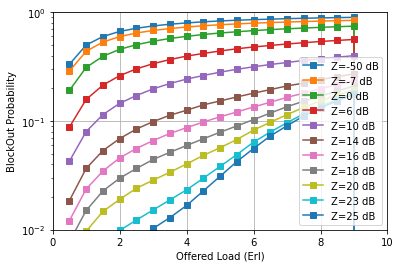

In [46]:
import numpy as np
import matplotlib.pyplot as plt


   
#Program Input 



# Offered Load in Erlangs
A = np.arange(start=0.5, stop=10, step=0.5) 

# Interference Margin 
Z = np.array([ -50, -7, 0, 6, 10, 14, 16, 18, 20, 23, 25, 50]) #in dB
Z = np.float_power(10,-Z/10) # in linear

# Number of resources
Nres = 10


#Number of simulations
Nsims = Z.shape[0] 

#Number of points (results) per simulation
Npoints = A.shape[0]

#Number of drops (events) per point
Ndrops = np.power(10,6) 

#Matrix for blocking probabiliy for each simulation
blockProb = np.zeros((Nsims,Npoints))

#Matrix for outage probabiliy for each simulation
outProb = np.zeros((Nsims,Npoints))

#Matrix for blockout probabiliy for each simulation
BOProb = np.zeros((Nsims,Npoints))

#Random variable generator (creating instance)
rng = np.random.default_rng()


#Discrete-event simulation
for i in range(0,Nsims-1):
    z = Z[i]
    
    for j in range(0,Npoints-1):
        a = A[j]
                
        #Number of occupied resources
        Noccup = 0
        
        #Number of arrivals
        Narriv = 0
        
        #Number of blocked arrivals
        Nblock = 0
        
        #Number of outaged arrivals
        Nout = 0
        
        #Event scheduler composed of event time (schedTime) and event type (schedType) 
        # Two types are defined: type 1 (arrival) and type 0 (departure)
        
        eventTime = np.array([0 , 0])
                              
        eventType = np.array([1 , 1])                      
        
        for k in range(0,Ndrops-1):
            
            #Deleting the last event of the scheduler
            eventTime = np.delete(eventTime,0)
            
            eventType = np.delete(eventType,0)  
            
            #Sorting the scheduler for the next event and update times
            eventType = np.take_along_axis(eventType,np.argsort(eventTime),axis=None)
            eventTime = np.sort(eventTime)
            eventTime -= eventTime[0]
            
            #If the event is an arrival
            if eventType[0]:
                
                #Generating the next arrival
                eventTime = np.append(eventTime, [rng.exponential(1/a)])
                eventType = np.append(eventType, [1])
                
                #Updating number of arrivals
                Narriv += 1
                
                #If total capacity is not fulfilled 
                if Noccup < Nres:
                    
                    #If interference is lower than threshold
                    interferers = rng.exponential(1,size=Noccup)
                    if rng.exponential(1) > z*(np.sum(interferers)):
                        
                        #Updating occupation of resources
                        Noccup += 1
                        
                        #Generating departure event
                        eventTime = np.append(eventTime, [rng.exponential(1)])
                        eventType = np.append(eventType, [0])

                    # Arrival is in outage
                    else:
                        Nout += 1
                
                #Arrival is blocked
                else:
                     Nblock += 1
                    
            # If the event is a departure
            else:
                Noccup -= 1
                
        blockProb[i,j] = Nblock/Narriv
        outProb[i,j] = Nout/Narriv
                   
BOProb =  blockProb + outProb


#Ploting BlockOut versus Offered Load
plt.xlabel('Offered Load (Erl)')
plt.ylabel('BlockOut Probability')
plt.grid(True)
plt.xlim([0,10])
plt.ylim([0.01,1])

Z = np.array([ -50, -7, 0, 6, 10, 14, 16, 18, 20, 23, 25, 50]) #in dB

for l in range(0,Nsims-1):
    plt.semilogy(A, BOProb[l,], '-s', label='Z=%d dB' %Z[l])  


    
plt.legend()


